In [33]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
X_larger = np.loadtxt('Data/lda_large.csv')

In [7]:
X_larger.shape

(120, 31)

In [8]:
y_large = X_larger[:,0]
X_larger = X_larger[:,1:]

In [12]:
lda_model = LinearDiscriminantAnalysis()
qda_model = QuadraticDiscriminantAnalysis()
log_model = LogisticRegression()

In [13]:
y_large.mean()

0.5

In [16]:
kfold = KFold(n_splits=20,shuffle=True)

In [19]:
lda_score = cross_val_score(lda_model,
                            X_larger,
                            y_large,
                            cv=kfold)
lda_score.mean()

0.90833333333333321

In [22]:
qda_model.fit(X_larger,y_large)
accuracy_score(qda_model.predict(X_larger),y_large)

1.0

In [23]:
qda_score = cross_val_score(qda_model,
                            X_larger,
                            y_large,
                            cv=kfold)
qda_score.mean()

0.73333333333333339

## Model qda sie przeuczyl

In [24]:
log_score = cross_val_score(log_model,
                            X_larger,
                            y_large,
                            cv=kfold)
log_score.mean()

0.84999999999999998

## Sprawdzenie zalozen

In [25]:
X_larger_0 = X_larger[y_large == 0]
X_larger_1 = X_larger[y_large == 1]

In [26]:
correlation_matrix_0 = X_larger_0.T.dot(X_larger_0)
correlation_matrix_1 = X_larger_1.T.dot(X_larger_1)

correlation_matrix_0 = correlation_matrix_0 / np.max(correlation_matrix_0)
correlation_matrix_1 = correlation_matrix_1 / np.max(correlation_matrix_1)

In [27]:
(correlation_matrix_0-correlation_matrix_1).max()

0.36216204604498814

In [28]:
X_small_dim = np.loadtxt('Data/lda_small.csv')

In [29]:
X_small = X_small_dim[:,1:]
y_small = X_small_dim[:,0]

In [30]:
y_small.mean()

0.5

In [31]:
X_small.shape

(200, 2)

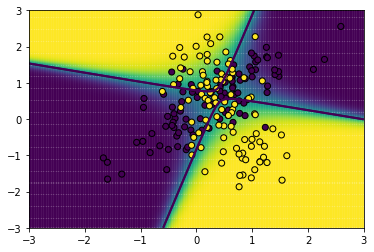

In [41]:
# pokazanie granicy decyzyjnej
nx, ny = 200, 200
x_min, x_max = -3,3
y_min, y_max = -3,3

xx , yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

Z = qda_model.fit(X_small, y_small).predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z ,alpha=0.5)
plt.contour(xx,yy,Z, [0.5], linewidths=2.)
plt.scatter(X_small[:, 0], X_small[:, 1], marker='o', c=y_small, edgecolors='black')
plt.show()

In [42]:
lda_score = cross_val_score(LinearDiscriminantAnalysis(),
                            X_small,
                            y_small,
                            cv=kfold)
lda_score.mean()

0.55000000000000004

In [43]:
qda_model.fit(X_small,y_small)
accuracy_score(qda_model.predict(X_small),y_small)

0.78000000000000003

In [44]:
qda_score = cross_val_score(qda_model,
                            X_small,
                            y_small,
                            cv=kfold)
qda_score.mean()

0.76500000000000012

In [45]:
log_score = cross_val_score(log_model,
                            X_small,
                            y_small,
                            cv=kfold)
log_score.mean()

0.53499999999999992